## 1. Collecting BRIC Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_palette('summer')
plt.style.use('seaborn')

In [2]:
nsei = pd.read_csv('data/BRICS EQUITY INDICES/NSEI.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
bvsp = pd.read_csv('data/BRICS EQUITY INDICES/BVSP.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
moex = pd.read_csv('data/BRICS EQUITY INDICES/MOEX.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']
sse = pd.read_csv('data/BRICS EQUITY INDICES/SSE.csv', header = 0, index_col = 0, parse_dates = True)['Adj Close']

# creating a portfolio of stock returns from the major indices in the BRIC stock markets
dat = pd.DataFrame(
    {
        'BRAZIL (BVSP)':bvsp,
        'RUSSIA (MOEX)':moex,
        'INDIA (NIFTY)':nsei,
        'CHINA (SSE)':sse
    }
)

dat = dat.dropna()

In [3]:
dat.describe()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
count,1742.000000,1742.000000,1742.000000,1742.000000
mean,71224.398393,78.015811,9272.196132,2950.558053
std,22228.203337,32.894386,2131.697602,547.594220
min,37645.000000,26.796057,5285.000000,1950.011963
25%,52377.250000,45.863086,7860.150146,2607.305054
50%,63706.500000,82.384152,8898.649903,3005.104004
75%,88491.000000,94.174501,10856.400146,3274.184021
max,125077.000000,177.470001,15245.599609,5131.880859


In [4]:
# create a return dataframe from price data considering percentage change as returns
returns = dat.pct_change().dropna()['2015':'2016']

In [5]:
returns.head()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2015-01-05,-0.049793,0.022689,0.015779,0.058343
2015-01-06,0.010186,0.024835,-0.029964,0.000277
2015-01-08,0.040457,0.000000,0.013196,-0.017303
2015-01-09,-0.022085,-0.028433,0.006060,-0.002442
2015-01-12,-0.014333,-0.009145,0.004647,-0.017074


In [6]:
des = returns.describe()
des.to_csv('descr.csv')

In [7]:
skew_vals = returns.skew()
kurtosis_vals = returns.kurtosis()

In [8]:
from scipy import stats
jb = pd.Series()
for x in returns.columns.values:
    jb[x] = (stats.jarque_bera(returns[x])[0])

ipykernel_launcher:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [9]:
jb

BRAZIL (BVSP)     85.300801
RUSSIA (MOEX)     38.606238
INDIA (NIFTY)    177.145799
CHINA (SSE)      361.448403
dtype: float64

In [10]:
desc = pd.DataFrame({
    "Skewness":skew_vals,
    "Kurtosis":kurtosis_vals,
    "Jarque Bera (Value, P(Normal))":jb
})

desc.to_csv('jb.csv')

In [11]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

In [12]:
def stationarity(df):
    import statsmodels.api as sm
    acf_p=acf(df, nlags=10)
    pacf_p=pacf(df, nlags=10)
    f, ax = plt.subplots(2, 2, sharey=True, figsize=(17,6))
    ax[0,0].plot(df)
    ax[0,0].set_title('Sharing Y axis')
    
    ax[0,1].plot(acf_p)
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[0,1].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[0,1].axhline(y=0, linestyle='--', color='gray')
    ax[0,1].set_title(str('ACF plot'))
    
    ax[1,0].plot(pacf_p)
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].axhline(y=1.96/(np.sqrt(len(df))), linestyle='--', color='gray')
    ax[1,0].axhline(y=-1.96/(np.sqrt(len(df))), linestyle='--', color='gray')            
    ax[1,0].axhline(y=0, linestyle='--', color='gray')
    ax[1,0].set_title(str('PACF plot'))
    

    sm.qqplot(df, line='s', ax=ax[1,1])
    ax[1,1].set_title(str('QQ plot'))
    
    rs=adfuller(df)
    plt.savefig(f'images/{i}.png')
    plt.show()

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


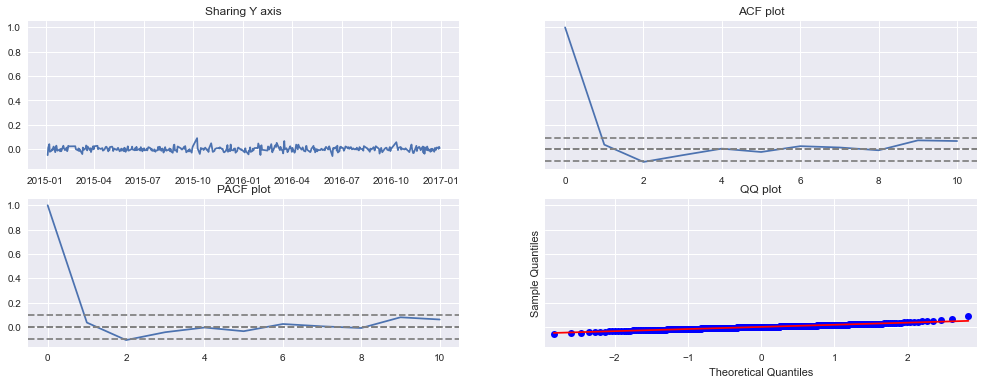

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


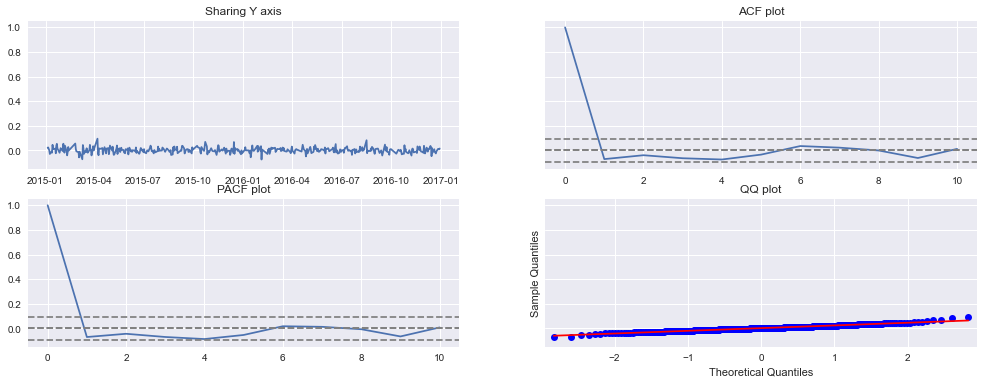

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


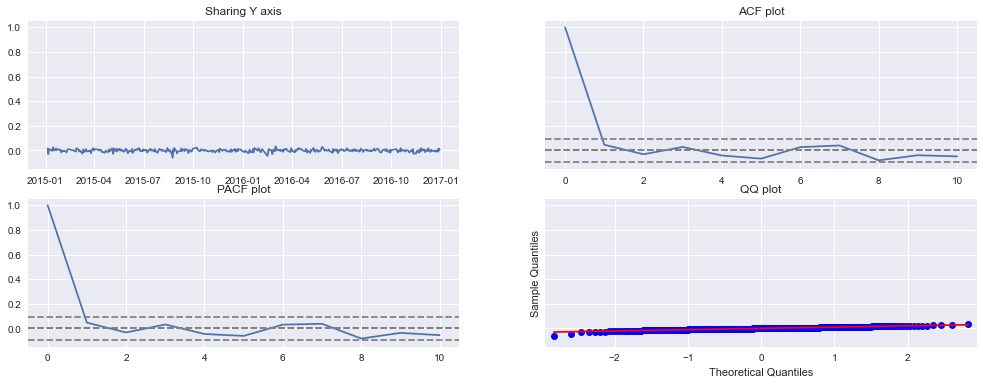

C:\Users\unnik\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


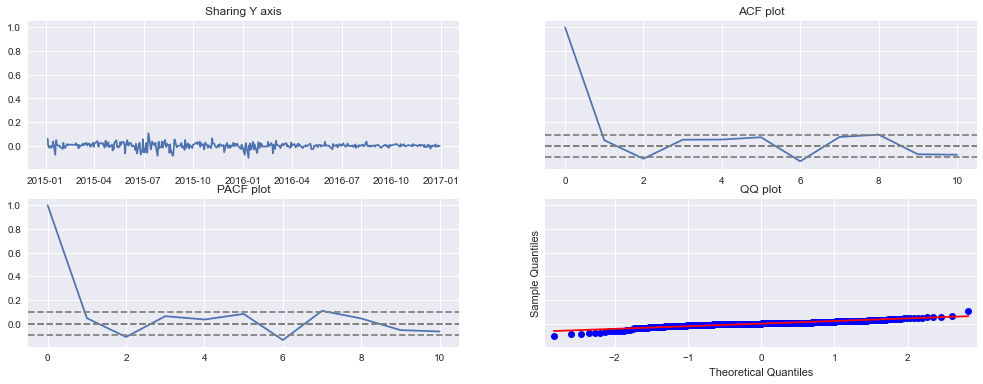

In [13]:
adf =  pd.DataFrame(
    index = np.array(['ADF statistic','p value','AIC autolag','Critical 1%','Critical 5%','Critical 10%']),
    columns= returns.columns
)
adf.columns = returns.columns
for i in returns.columns:
    stationarity(returns[i])
    temp = (adfuller(returns[i]))
    adf[i]['ADF statistic'] = temp[0]
    adf[i]['p value'] = temp[1]
    adf[i]['AIC autolag'] = temp[2]
    adf[i]['Critical 1%'] = temp[4]['1%']
    adf[i]['Critical 5%'] = temp[4]['5%']
    adf[i]['Critical 10%'] = temp[4]['10%']


In [14]:
adf.to_csv('adf.csv')

## 2. GSEV Approach

### I. Estimate an AR(1)-EGARCH(1,1) model for each asset 𝑖, and obtain parameter estimates, conditional sigmas and residuals

{Xt} is called an autoregressive process of order k with an GARCH noise of order p, q, in short

AR(k)-EGARCH(p,q) process, 

if for t = 0, ±1, ±, 2, . . . :

>$$Xt = ϕ_1X_{t−1} + · · · + ϕ_kX_{t−k} + ε_t$$

>$$ε_t = σ_tv_t$$

where $v_t$ is a strong white noise (iid (0,1)), and $σ_t$ satisfies the recurrence equation:

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + . . . . \alpha_p g({v_{t-p}}) + \beta_1 ln({\sigma_{t-1}} ^2) + . . . . \beta_q ln({\sigma_{t-q}} ^2)$$

where 

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$

Here, we are following the AR(1)-EGARCH(1,1)

Hence, our process is:

>$$Xt = ϕ_1X_{t−1} + ε_t$$

>$$ε_t = σ_tv_t$$

>$$ ln(σ_t^2) = \alpha_0 + \alpha_1 g({v_{t-1}}) + \beta_1 ln({\sigma_{t-1}} ^2) $$

>$$g(v_t) = \theta v_t + \delta (|v_t| - E|v_t|)$$


In [15]:
import armagarch as ag


# define mean, vol and distribution
meanMdl = ag.ARMA(order = {'AR':1,'MA':0})
volMdl = ag.garch(order = {'p':1,'q':1}) 
distMdl = ag.normalDist()

for i in returns.columns:
    # create a model
    model = ag.empModel(returns[i].to_frame(), meanMdl, volMdl, distMdl)

    # fit model
    model.fit()

    # get the conditional mean
    Ey = model.Ey

    # get conditional variance
    ht = model.ht
    cvol = np.sqrt(ht)

    # get standardized residuals
    stres = model.stres

    # make a prediction of mean and variance over next 3 days.
    pred = model.predict(nsteps = 1)


                         ARMA-GARCH estimation results                          
Dep Variable:           BRAZIL (BVSP)    R-squared:                      -0.01
Mean Model:                      ARMA    Adj. R-squared:                 -0.02
Vol Model:                      GARCH    Log Likelihood:               1100.56
Distribution:                Gaussian    AIC:                         -2191.11
Method:                            ML    BIC:                         -2170.81
                                         Num obs:                          428
Date:                Tue, Apr 20 2021    Df Residuals:                     424
Time:                        22:18:42    Df Model:                           4
                                                                                
                                   Mean Model                                   
                            Estimate          Std. Error              t-stat
------------------------------------------------

### II. Calculating Standardized residuals and conditional volatility

In [16]:
from arch import arch_model
from arch.univariate import SkewStudent
from scipy.stats import nct 
res = []

In [17]:
for i in returns.columns: 
    m = arch_model(returns[i], mean = 'AR', vol= "EGARCH", p=1, o=0, q=1, dist= 'SkewStudent', rescale = False)
    res.append((i, m.fit(update_freq=10)))

Iteration:     10,   Func. Count:     95,   Neg. LLF: -1134.2030925180495
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1138.8828649584934
            Iterations: 19
            Function evaluations: 159
            Gradient evaluations: 19
Iteration:     10,   Func. Count:     97,   Neg. LLF: 7507.986904155098
Iteration:     20,   Func. Count:    196,   Neg. LLF: -841.8405835234694
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1043.993173485108
            Iterations: 29
            Function evaluations: 270
            Gradient evaluations: 28
Iteration:     10,   Func. Count:     97,   Neg. LLF: 746.3508416559472
Iteration:     20,   Func. Count:    171,   Neg. LLF: -1362.6444094239182
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1362.6456961725592
            Iterations: 25
            Function evaluations: 208
            Gradient evaluations: 25


In [18]:
res

[('BRAZIL (BVSP)',
                                  AR - EGARCH Model Results                                
  Dep. Variable:                     BRAZIL (BVSP)   R-squared:                      -0.000
  Mean Model:                                   AR   Adj. R-squared:                 -0.000
  Vol Model:                                EGARCH   Log-Likelihood:                1138.88
  Distribution:      Standardized Skew Student's t   AIC:                          -2265.77
  Method:                       Maximum Likelihood   BIC:                          -2241.41
                                                     No. Observations:                  428
  Date:                           Tue, Apr 20 2021   Df Residuals:                      422
  Time:                                   22:18:46   Df Model:                            6
                                    Mean Model                                 
                   coef    std err          t      P>|t|       95.0% Conf

In [19]:
fit_out = open(r"garch_fit.txt","w+")
for i in res:
    print(i[0], '\n', file = fit_out)
    print(i[1], '\n', file = fit_out)
fit_out.close()

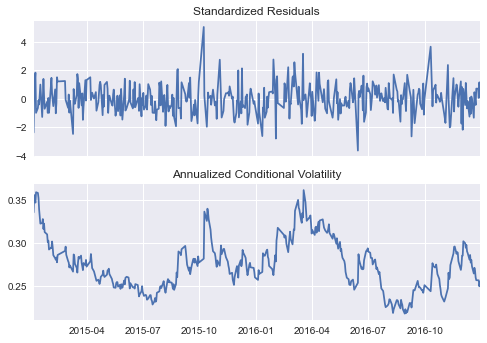

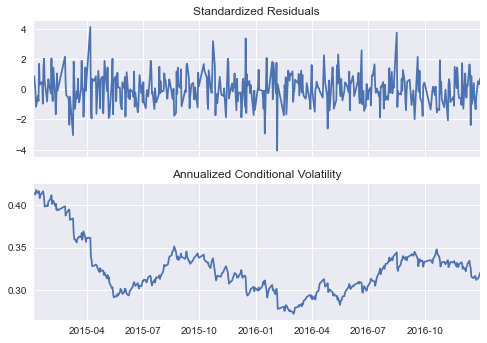

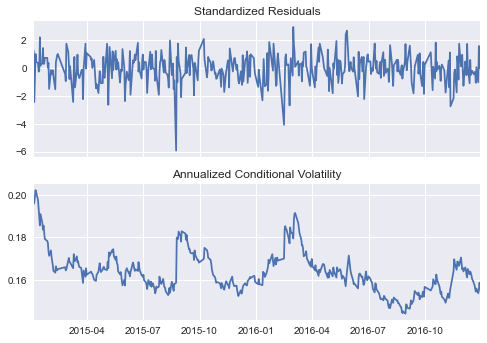

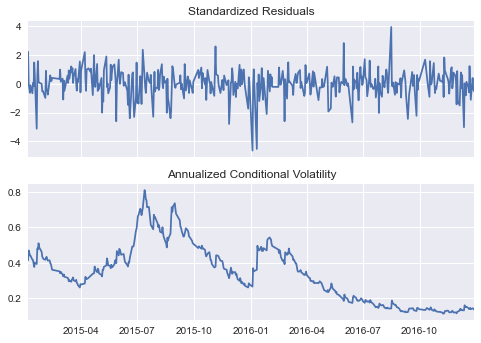

In [20]:
for i in range(4):
    fig = res[i][1].plot(annualize="D")
    fig.savefig(f'images/resid_{res[i][0]}.png')

### III. Fit univariate skewed-t distributions to each vector of residuals by MLE.

This fit is computed by maximizing a log-likelihood function, with penalty applied for samples outside of range of the distribution. The returned answer is not guaranteed to be the globally optimal MLE, it may only be locally optimal, or the optimization may fail altogether. If the data contain any of np.nan, np.inf, or -np.inf, the fit routine will throw a RuntimeError.

In [21]:
resid_dat = pd.DataFrame({})

In [22]:
pip install skewstudnet

Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement skewstudnet (from versions: none)
ERROR: No matching distribution found for skewstudnet


C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\unnik\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


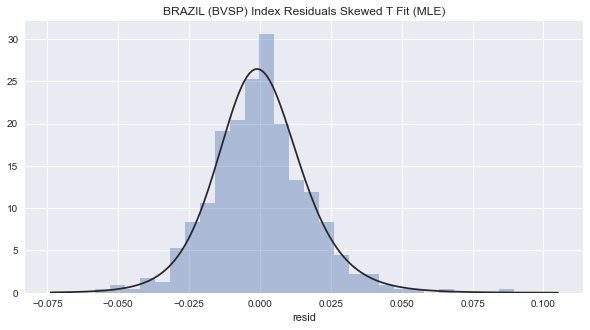

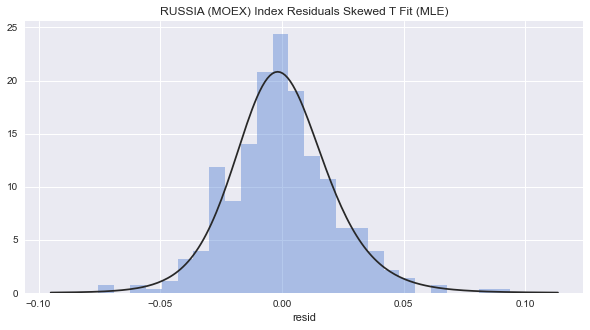

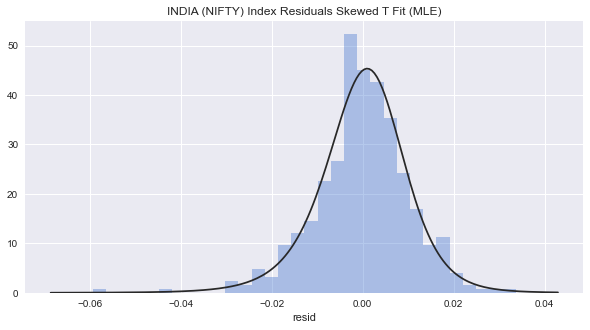

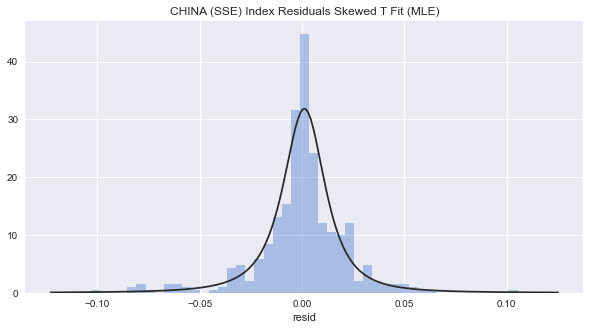

In [23]:
from scipy.stats import nct
from arch.univariate import SkewStudent
for i in range(4):
    plt.figure(figsize=(10, 5))
    plt.title(f"{res[i][0]} Index Residuals Skewed T Fit (MLE)")
    sns.set_palette('muted')
    sns.distplot(res[i][1].resid, fit = nct, kde=False)
    plt.savefig(f'images/{res[i][0]}_skewed_std.png')
    resid_dat[res[i][0]] = res[i][1].resid

In [24]:
resid_dat

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2015-01-05,-0.050197,0.020520,0.015688,0.057964
2015-01-06,0.009782,0.022666,-0.030055,-0.000103
2015-01-08,0.040054,-0.002169,0.013105,-0.017682
2015-01-09,-0.022489,-0.030602,0.005969,-0.002822
2015-01-12,-0.014736,-0.011314,0.004556,-0.017454
...,...,...,...,...
2016-12-23,0.011508,-0.009232,0.000742,-0.009745
2016-12-26,0.011385,0.010517,-0.009796,0.003613
2016-12-27,0.000910,0.008665,0.015664,-0.002911


### IV. Estimate the covariance matrix ̂
>$$\Sigma^{*} = \frac{𝜐 − 2}v 𝑐𝑜𝑣 (𝑋) − 𝛽̂𝛽̂′ \frac{2𝜐^2}{(𝑣 − 2)^2(𝑣 − 4)}$$

In [25]:
import warnings
warnings.filterwarnings('ignore')

from copulas.multivariate import GaussianMultivariate
from copulas.univariate import StudentTUnivariate
from copulas.visualization import compare_3d

res_copy = resid_dat.copy()
real_data = res_copy

# Fit a gaussian copula to the data
copula = GaussianMultivariate(distribution = StudentTUnivariate)
copula.fit(real_data)

In [26]:
parameters = copula.to_dict()
parameters.keys()

dict_keys(['covariance', 'univariates', 'columns', 'type'])

In [27]:
cov_new = pd.DataFrame(parameters['covariance'])
cov_new.columns = returns.columns
cov_new.index = returns.columns
# new correlation matrix
cov_new

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
BRAZIL (BVSP),1.000000,0.151697,0.310262,0.126036
RUSSIA (MOEX),0.151697,1.000000,0.134356,0.073477
INDIA (NIFTY),0.310262,0.134356,1.000000,0.209140
CHINA (SSE),0.126036,0.073477,0.209140,1.000000


In [28]:
gsev_cov = returns.std() * cov_new * returns.std()

In [29]:
gsev_cov

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
BRAZIL (BVSP),0.000308,0.000073,0.000034,0.000062
RUSSIA (MOEX),0.000047,0.000479,0.000015,0.000036
INDIA (NIFTY),0.000096,0.000064,0.000109,0.000102
CHINA (SSE),0.000039,0.000035,0.000023,0.000490


In [30]:
returns.cov()

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
BRAZIL (BVSP),0.000308,0.000059,0.000059,0.000060
RUSSIA (MOEX),0.000059,0.000479,0.000031,0.000039
INDIA (NIFTY),0.000059,0.000031,0.000109,0.000052
CHINA (SSE),0.000060,0.000039,0.000052,0.000490


### V. Draw N independent d-dimensional vectors from the multivariate Gaussian distribution

In [31]:
# Sample synthetic data
synthetic_data = copula.sample(len(real_data))

In [32]:
synthetic_data

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
0,-0.004736,-0.013359,-0.022770,0.011500
1,0.007461,0.024051,-0.010338,-0.018392
2,0.004434,-0.016940,-0.005673,-0.005614
3,-0.001694,-0.019157,-0.003363,-0.080394
4,-0.020486,0.006898,0.007202,-0.092892
...,...,...,...,...
423,-0.009342,-0.057359,0.002082,-0.009466
424,-0.018941,0.002599,-0.004618,0.001968
425,0.016549,0.007803,-0.007556,-0.004036
426,0.018654,-0.007614,-0.021928,0.000259


In [33]:
resid_dat

,BRAZIL (BVSP),RUSSIA (MOEX),INDIA (NIFTY),CHINA (SSE)
Date,,,,
2015-01-05,-0.050197,0.020520,0.015688,0.057964
2015-01-06,0.009782,0.022666,-0.030055,-0.000103
2015-01-08,0.040054,-0.002169,0.013105,-0.017682
2015-01-09,-0.022489,-0.030602,0.005969,-0.002822
2015-01-12,-0.014736,-0.011314,0.004556,-0.017454
...,...,...,...,...
2016-12-23,0.011508,-0.009232,0.000742,-0.009745
2016-12-26,0.011385,0.010517,-0.009796,0.003613
2016-12-27,0.000910,0.008665,0.015664,-0.002911


<AxesSubplot:>

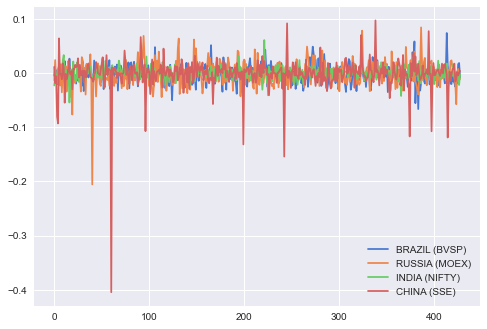

In [34]:
synthetic_data.plot()

([<matplotlib.axis.YTick at 0x124b62f0348>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

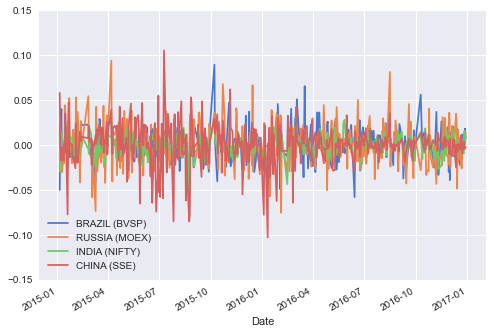

In [35]:
resid_dat.plot()
plt.yticks(ticks = np.arange(-0.15,0.20, 0.05))

In [36]:
resid_dat_cop = resid_dat[['BRAZIL (BVSP)', 'RUSSIA (MOEX)', 'INDIA (NIFTY)']]
resid_dat_cop.columns = ['x', 'y', 'z']
synth_dat_cop = synthetic_data[['BRAZIL (BVSP)', 'RUSSIA (MOEX)', 'INDIA (NIFTY)']]
synth_dat_cop.columns = ['x', 'y', 'z']

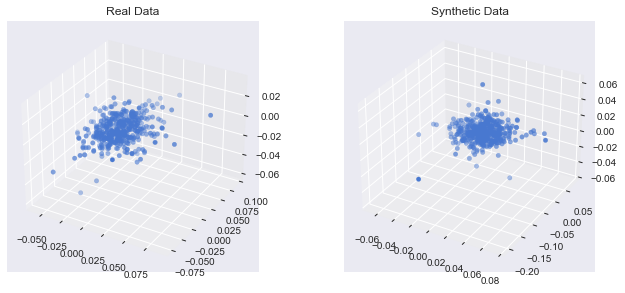

In [37]:
compare_3d(resid_dat_cop, synth_dat_cop)
plt.savefig('images/synthres.png')

## 3. Backtesting

In [38]:
from datetime import datetime, timedelta
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.window import Window
from pyspark.sql.types import *
from pyspark.sql import functions as F

In [39]:
def weight_ew(r, cap_ws=None, max_cw_mult=None, microcap_thr=None, **kwargs):
    """
    Returns the weights of the Equally-Weighted (EW) portfolio based on the asset returns "r" as a DataFrame. 
    If the set of cap_ws is given, the modified scheme is computed, i.e., 
    microcaps are removed and a capweight tether applied.
    """
    ew = pd.Series(1/len(r.columns), index=r.columns)
    if cap_ws is not None:
        cw = cap_ws.loc[r.index[0]] # starting cap weight
        if microcap_thr is not None and microcap_thr > 0.0:
            # exclude microcaps according to the threshold    
            ew[ cw < microcap_thr ] = 0
            ew = ew / ew.sum()
        if max_cw_mult is not None and max_cw_mult > 0:
            # limit weight up to a multiple of capweight
            ew = np.minimum(ew, cw*max_cw_mult)
            ew = ew / ew.sum()
    return ew

In [40]:
def weight_rp(returns, cov_estimator= returns.cov(), **kwargs):
    '''
    Produces the weights of the risk parity portfolio given a covariance matrix of the returns.
    The default coavariance estimator is the sample covariance matrix.
    '''
    est_cov = cov_estimator(r, **kwargs)
    return risk_parity_weigths(est_cov)

def portfolio_volatility(weights, cov_rets):
    '''
    Computes the volatility of a portfolio. 
    It takes in input a vector of weights (np.array or pd.Series) 
    and the covariance matrix of the portfolio asset returns
    '''
    return ( np.dot(weights.T, np.dot(cov_rets, weights)) )**(0.5)  

In [41]:
def backtest_weight_scheme(r, window=36, weight_scheme=weight_ew, **kwargs):
    '''
    Backtests a given weighting scheme. Here:
    - r: asset returns to use to build the portfolio
    - window: the rolling window used
    - weight_scheme: the weighting scheme to use, it must the name of a 
    method that takes "r", and a variable number of keyword-value arguments
    '''
    n_periods = r.shape[0]
    windows = [ (start, start+window) for start in range(0,n_periods-window) ]
    weights = [ weight_scheme( r.iloc[win[0]:win[1]], **kwargs) for win in windows ]
    weights = pd.DataFrame(weights, index=r.iloc[window:].index, columns=r.columns)    
    returns = (weights * r).sum(axis=1,  min_count=1) #mincount is to generate NAs if all inputs are NAs
    return returns

In [42]:
def minimize_volatility(rets, covmatrix, target_return=None):
    '''
    Returns the optimal weights of the minimum volatility portfolio on the effient frontier. 
    If target_return is not None, then the weights correspond to the minimum volatility portfolio 
    having a fixed target return. 
    The method uses the scipy minimize optimizer which solves the minimization problem 
    for the volatility of the portfolio
    '''

    from scipy.optimize import minimize
    n_assets = rets.shape[0]    
    # initial guess weights
    init_guess = np.repeat(1/n_assets, n_assets)
    weights_constraint = {
        "type": "eq",
        "fun": lambda w: 1.0 - np.sum(w)  
    }
    if target_return is not None:
        return_constraint = {
            "type": "eq",
            "args": (rets,),
            "fun": lambda w, r: target_return - portfolio_return(w, r)
        }
        constr = (return_constraint, weights_constraint)
    else:
        constr = weights_constraint
        
    result = minimize(portfolio_volatility, 
                      init_guess,
                      args = (covmatrix,),
                      method = "SLSQP",
                      options = {"disp": False},
                      constraints = constr,
                      bounds = ((0.0,1.0),)*n_assets ) # bounds of each individual weight, i.e., w between 0 and 1
    return result.x

def annualize_rets(s, periods_per_year):
    '''
    Computes the return per year, or, annualized return.
    The variable periods_per_year can be, e.g., 12, 52, 252, in 
    case of monthly, weekly, and daily data.
    The method takes in input either a DataFrame or a Series and, in the former 
    case, it computes the annualized return for every column (Series) by using pd.aggregate
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( annualize_rets, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        growth = (1 + s).prod()
        n_period_growth = s.shape[0]
        return growth**(periods_per_year/n_period_growth) - 1


In [43]:
def weight_minvar(returns, cov_estimator=returns.cov(), periods_per_year=12, **kwargs):
    '''
    Produces the weights of the Minimum Volatility Portfolio given a covariance matrix of the returns 
    '''
    est_cov = cov_estimator
    ann_ret = annualize_rets(returns, periods_per_year=252)
    return minimize_volatility(ann_ret, est_cov)

In [44]:
def var_historic(s, level=0.05):
    '''
    Returns the (1-level)% VaR using historical method. 
    By default it computes the 95% VaR, i.e., alpha=0.95 which gives level 1-alpha=0.05.
    The method takes in input either a DataFrame or a Series and, in the former 
    case, it computes the VaR for every column (Series) by using pd.aggregate
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( var_historic, level=level )
    elif isinstance(s, pd.Series):
        return - np.percentile(s, level*100)
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")

def cvar_historic(s, level=0.05):
    '''
    Computes the (1-level)% Conditional VaR (based on historical method).
    By default it computes the 95% CVaR, i.e., alpha=0.95 which gives level 1-alpha=0.05.
    The method takes in input either a DataFrame or a Series and, in the former 
    case, it computes the VaR for every column (Series).
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( cvar_historic, level=level )
    elif isinstance(s, pd.Series):
        # find the returns which are less than (the historic) VaR
        mask = s < -var_historic(s, level=level)
        # and of them, take the mean 
        return -s[mask].mean()
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")
    
def portfolio_return(weights, vec_returns):
    '''
    Computes the return of a portfolio. 
    It takes in input a row vector of weights (list of np.array) 
    and a column vector (or pd.Series) of returns
    '''
    return np.dot(weights, vec_returns)

In [45]:
weight_ew_rets = np.array(weight_ew(returns))
tot_mkt_rets = pd.Series(np.dot(returns, weight_ew_rets))

In [47]:
alpha = 0.995
level = 1 - alpha
window = 12
N = tot_mkt_rets.shape[0]
roll_window  = 12*3
windows = [ [start, start + roll_window] for start in range(0,N-window) ]
nans = np.repeat(np.nan,window).tolist()
histvars = [ var_historic(tot_mkt_rets[w[0]:w[1]], level) for w in windows ]
histvars = pd.Series(nans + histvars, index=tot_mkt_rets.index)

histES = [ cvar_historic(tot_mkt_rets[w[0]:w[1]], level) for w in windows ]
histES = pd.Series(nans + histES, index=tot_mkt_rets.index)


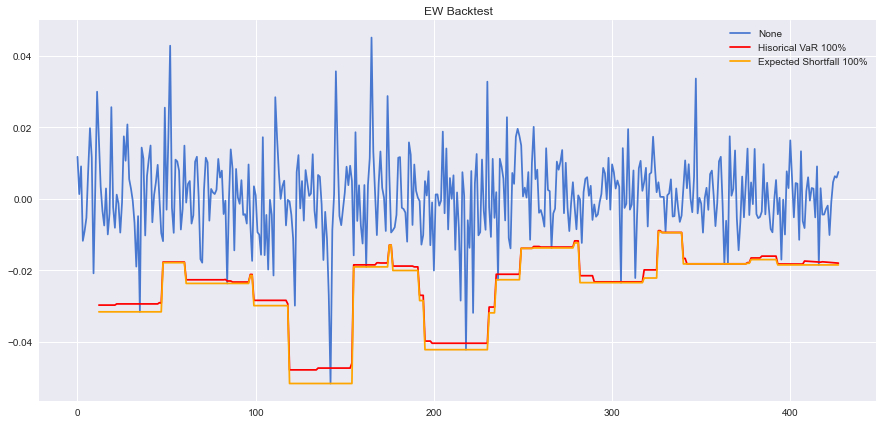

In [48]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
tot_mkt_rets.plot(ax=ax, grid=True)

#histvars.plot(ax=ax, grid=True, color="red",  )
(-histvars).plot(ax=ax, grid=True, color="red", label="Hisorical VaR {:.0f}%".format(alpha*100))

#histES.plot(ax=ax, grid=True, color="orange")
(-histES).plot(ax=ax, grid=True, color="orange", label="Expected Shortfall {:.0f}%".format(alpha*100) )
plt.title('EW Backtest')
plt.savefig('images/backtest.png')
plt.legend()
plt.show()

In [53]:
weight_gsev = np.array(weight_minvar(returns, cov_estimator = gsev_cov))
tot_mkt_rets = pd.Series(np.dot(returns, weight_gsev))

In [54]:
weight_gsev

array([0.11868826, 0.1107749 , 0.68651481, 0.08402203])

In [55]:
alpha = 0.995
level = 1 - alpha

N = tot_mkt_rets.shape[0]
roll_window  = 12*3
windows = [ [start, start + roll_window] for start in range(0,N-window) ]
nans = np.repeat(np.nan,window).tolist()
histvars = [ var_historic(tot_mkt_rets[w[0]:w[1]], level) for w in windows ]
histvars = pd.Series(nans + histvars, index=tot_mkt_rets.index)

histES = [ cvar_historic(tot_mkt_rets[w[0]:w[1]], level) for w in windows ]
histES = pd.Series(nans + histES, index=tot_mkt_rets.index)


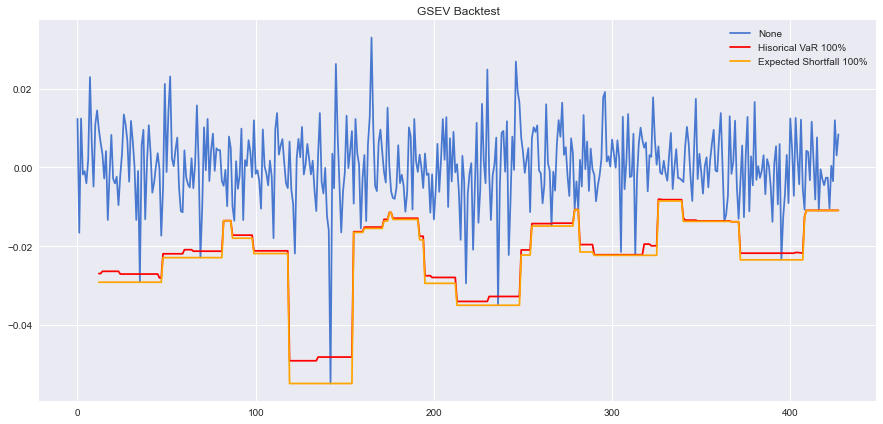

In [56]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
tot_mkt_rets.plot(ax=ax, grid=True)

#histvars.plot(ax=ax, grid=True, color="red",  )
(-histvars).plot(ax=ax, grid=True, color="red", label="Hisorical VaR {:.0f}%".format(alpha*100))

#histES.plot(ax=ax, grid=True, color="orange")
(-histES).plot(ax=ax, grid=True, color="orange", label="Expected Shortfall {:.0f}%".format(alpha*100) )
plt.title('GSEV Backtest')
plt.savefig('images/backtest_2.png')
plt.legend()
plt.show()